## Analisis Exploratorio de Datos
**Datasets de establecimientos educativos y poblacion total por municipio**

In [ ]:
#instalamos librerias que no estan en colab

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
pip install folium


In [ ]:
#importamos librerias para realizar el AED
import pandas as pd
import ssl
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import BinaryEncoder
import folium


In [ ]:
ssl._create_default_https_context = ssl._create_unverified_context #config de ssl, desactiva la verificación de certificados HTTPS.
pd.options.display.float_format = '{:.2f}'.format #config de pandas para mostrar los valores con dos decimales

#establecimientos educativos (indice de desfavorabilidad)
url = "https://raw.githubusercontent.com/ValentinoCattaneoLuna/datasets_ciencia_de_datos/refs/heads/main/establecimientos-educativos-08092025.csv"
df1 = pd.read_csv(url)

#poblacion total por municipio
url2 = "https://raw.githubusercontent.com/ValentinoCattaneoLuna/datasets_ciencia_de_datos/main/poblacion_municipios_censo2022.csv"
df2 = pd.read_csv(url2)



In [ ]:
#informacion de dataframe de establecimientos educativos
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21573 entries, 0 to 21572
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   municipio_id            21573 non-null  int64  
 1   municipio_nombre        21573 non-null  object 
 2   establecimiento_id      21573 non-null  int64  
 3   establecimiento_nombre  21573 non-null  object 
 4   region_educativa        21573 non-null  object 
 5   clave                   21573 non-null  object 
 6   cueanexo                21573 non-null  int64  
 7   modalidad               21573 non-null  object 
 8   nivel                   21573 non-null  object 
 9   direccion               21573 non-null  object 
 10  telefono                21573 non-null  object 
 11  rpv                     6110 non-null   object 
 12  email                   21224 non-null  object 
 13  sector                  21573 non-null  object 
 14  dependencia             21573 non-null

None

In [ ]:
#informacion de dataframe de poblacion por municipio
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   municipio                       135 non-null    object
 1   poblacion_total                 135 non-null    int64 
 2   poblacion_nativa                135 non-null    int64 
 3   poblacion_extranjera_pais       135 non-null    int64 
 4   poblacion_extranjera_provincia  135 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 5.4+ KB


None

In [ ]:
#primeras 10 filas de establecimientos educativos
display(df1.head(10).T)

,0,1,2,3,4,5,6,7,8,9
municipio_id,6441,6441,6441,6441,6441,6441,6441,6441,6441,6441
municipio_nombre,La Plata,La Plata,La Plata,La Plata,La Plata,La Plata,La Plata,La Plata,La Plata,La Plata
establecimiento_id,1,1,1,2,3,7,7,7,8,8
establecimiento_nombre,ESCUELA DE DANZAS CLASICAS Nº3,ESCUELA DE DANZAS CLASICAS Nº3,ESCUELA DE DANZAS CLASICAS Nº3,"ESCUELA DE EDUCACIÓN ARTÍSTICA Nº1 ""MARÍA INÉS...",ESCUELA DE EDUCACIÓN ARTÍSTICA Nº2,"CONSERVATORIO DE MÚSICA ""GILARDO-GILARDI""","CONSERVATORIO DE MÚSICA ""GILARDO-GILARDI""","CONSERVATORIO DE MÚSICA ""GILARDO-GILARDI""",ESCUELA DE TEATRO LA PLATA,ESCUELA DE TEATRO LA PLATA
region_educativa,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I
clave,0001AD0003,0001AD0003,0001AD0003,0001AE0001,0001AE0002,0001AM0001,0001AM0001,0001AM0001,0001AT0004,0001AT0004
cueanexo,61060000,61060000,61060000,61498400,61498500,60794600,60794600,60794600,61288400,61288400
modalidad,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística
nivel,Ciclo Medio,Nivel Superior,Ciclo de Iniciación,Cursos y Talleres,Cursos y Talleres,Ciclo Medio,Ciclo de Iniciación,Nivel Superior,Ciclo Medio,Ciclo de Iniciación
direccion,54 E/ 7 Y 8 - 628,54 E/ 7 Y 8 - 628,54 E/ 7 Y 8 - 628,45 - 743,76 - RELOCALIZADOS EN EL ISFDYT N° 12 - S/N,CAMINO GENERAL BELGRANO Y 523 - S/N,CAMINO GENERAL BELGRANO Y 523 - S/N,CAMINO GENERAL BELGRANO Y 523 - S/N,AV. 51 - 419,AV. 51 - 419


In [ ]:
#primeras 10 filas de poblacion por municipio
display(df2.head(10))

,municipio,poblacion_total,poblacion_nativa,poblacion_extranjera_pais,poblacion_extranjera_provincia
0,25 De Mayo,35563,34969,442,2276
1,9 De Julio,52607,51699,667,3343
2,Adolfo Alsina,17552,17171,173,1795
3,Adolfo Gonzales Chaves,12914,12753,94,642
4,Alberti,12982,12632,274,1159
5,Almirante Brown,584827,554515,28694,89522
6,Arrecifes,32215,31734,343,3453
7,Avellaneda,367554,339492,26625,67348
8,Ayacucho,21977,21569,188,1058
9,Azul,75905,73512,1640,6096


In [ ]:
#Aca se modifica la columna subvencion del DataFrame df1 para evitar errores cuando hay diferencias por espacios o mayúsculas.
df1['subvencion'] = df1['subvencion'].astype(str).str.strip().str.replace('\s+', ' ', regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-712668388.py:2: SyntaxWarning: invalid escape sequence '\s'
  df1['subvencion'] = df1['subvencion'].astype(str).str.strip().str.replace('\s+', ' ', regex=True)


In [ ]:
#dejamos solo los datos que vamos a utilizar para el merge
print(f'Dimensiones de poblacion por municipio antes de reducir: {df2.shape}') #mostramos las dimensiones del dataframe de poblacion total antes de reducir las columnas

df2_copia = df2[["municipio","poblacion_total"]].copy() #guardamos el dataframe reducido en una copia para no modificar el original

print(f'Dimensiones de poblacion por municipio despues de reducir: {df2_copia.shape}') #mostramos las dimensiones del dataframe de poblacion total despues de reducir las columnas

Dimensiones de poblacion por municipio antes de reducir: (135, 5)
Dimensiones de poblacion por municipio despues de reducir: (135, 2)


In [ ]:
#eliminamos espacios y convertimos en minusculas el contenido de las filas para evitar inconsistencias
#para poder unir los df sin perder datos
df1['municipio_nombre'] = df1['municipio_nombre'].str.strip() #eliminamos espacios
df1['municipio_nombre'] = df1['municipio_nombre'].str.lower() #converitmos a minusculas

df2_copia['municipio'] = df2_copia['municipio'].str.strip() #eliminamos espacios
df2_copia['municipio'] = df2_copia['municipio'].str.lower() #converitmos a minusculas


In [ ]:

print(f'dimensiones de establecimientos educativos antes del merge: {df1.shape}') #mostramos las dimensiones del dataframe de establecimientos educativos antes de combinarlo con el de poblacion total

df = pd.merge(df1, df2_copia, left_on='municipio_nombre',right_on="municipio", how='left')
#realizamos un union entre ambos dataframes comparando 'municipio_nombre del df1 y 'municipio' del df2
#se usa el parametro how='left' para mantener todos los datos de df1 y sumar las columnas de df2 cuando hayan coincidencias
#con esto creamos un nuevo dataframe (df)

print(f'dimensiones de establecimientos educativos despues del merge: {df.shape}') #mostramos las dimensiones del dataframe de establecimientos educativos despues de combinarlo con el de poblacion total


dimensiones de establecimientos educativos antes del merge: (21573, 35)
dimensiones de establecimientos educativos despues del merge: (21573, 37)


In [ ]:
#informacion de los dataframes despues del merge
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21573 entries, 0 to 21572
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   municipio_id            21573 non-null  int64  
 1   municipio_nombre        21573 non-null  object 
 2   establecimiento_id      21573 non-null  int64  
 3   establecimiento_nombre  21573 non-null  object 
 4   region_educativa        21573 non-null  object 
 5   clave                   21573 non-null  object 
 6   cueanexo                21573 non-null  int64  
 7   modalidad               21573 non-null  object 
 8   nivel                   21573 non-null  object 
 9   direccion               21573 non-null  object 
 10  telefono                21573 non-null  object 
 11  rpv                     6110 non-null   object 
 12  email                   21224 non-null  object 
 13  sector                  21573 non-null  object 
 14  dependencia             21573 non-null

None

In [ ]:
#primeras 10 filas de los establecimientos educativos combinados con la poblacion total por municipio

display(df.head(10).T)

,0,1,2,3,4,5,6,7,8,9
municipio_id,6441,6441,6441,6441,6441,6441,6441,6441,6441,6441
municipio_nombre,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata
establecimiento_id,1,1,1,2,3,7,7,7,8,8
establecimiento_nombre,ESCUELA DE DANZAS CLASICAS Nº3,ESCUELA DE DANZAS CLASICAS Nº3,ESCUELA DE DANZAS CLASICAS Nº3,"ESCUELA DE EDUCACIÓN ARTÍSTICA Nº1 ""MARÍA INÉS...",ESCUELA DE EDUCACIÓN ARTÍSTICA Nº2,"CONSERVATORIO DE MÚSICA ""GILARDO-GILARDI""","CONSERVATORIO DE MÚSICA ""GILARDO-GILARDI""","CONSERVATORIO DE MÚSICA ""GILARDO-GILARDI""",ESCUELA DE TEATRO LA PLATA,ESCUELA DE TEATRO LA PLATA
region_educativa,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I
clave,0001AD0003,0001AD0003,0001AD0003,0001AE0001,0001AE0002,0001AM0001,0001AM0001,0001AM0001,0001AT0004,0001AT0004
cueanexo,61060000,61060000,61060000,61498400,61498500,60794600,60794600,60794600,61288400,61288400
modalidad,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística
nivel,Ciclo Medio,Nivel Superior,Ciclo de Iniciación,Cursos y Talleres,Cursos y Talleres,Ciclo Medio,Ciclo de Iniciación,Nivel Superior,Ciclo Medio,Ciclo de Iniciación
direccion,54 E/ 7 Y 8 - 628,54 E/ 7 Y 8 - 628,54 E/ 7 Y 8 - 628,45 - 743,76 - RELOCALIZADOS EN EL ISFDYT N° 12 - S/N,CAMINO GENERAL BELGRANO Y 523 - S/N,CAMINO GENERAL BELGRANO Y 523 - S/N,CAMINO GENERAL BELGRANO Y 523 - S/N,AV. 51 - 419,AV. 51 - 419


In [ ]:
#realizamos una copia para poder modificar columnas y no perder la informacion original
df_copia = df.copy()

#eliminamos columnas que consideramos irrelevantes para nuestro objetivo de analisis
df_copia.drop(columns=['municipio','municipio_id','establecimiento_id', 'clave','cueanexo','telefono','rpv','email','periodo'],axis=1, inplace=True)


In [ ]:
#vamos a codificar columnas con datos categoricos para mejorar el analisis futuro
#usamos one hot para codificar columnas entre 3 y 5 valores
df_copia_one_hot = pd.get_dummies(df_copia, columns=['ambito','categoria','dependencia'],dtype=int)


#usamos codificacion binaria para columnas de mas de 5 valores
encoder = BinaryEncoder(cols=["subvencion","region_educativa","depend_func","tipo_organizacion"])
encoder.fit(df_copia[["subvencion", "region_educativa", "depend_func", "tipo_organizacion"]])

df_copia_binaria = encoder.transform(df_copia[["subvencion", "region_educativa", "depend_func", "tipo_organizacion"]])

df_copia_one_hot_binaria = pd.concat([df_copia_one_hot, df_copia_binaria], axis=1)

#creamos una columna unica para columnas con 2 valores
df_copia_one_hot_binaria['sector_bin'] = df_copia['sector'].map({'Privado': 1, 'Estatal': 0})
df_copia_one_hot_binaria['area_bin'] = df_copia['area'].map({'CONURBANO': 1, 'INTERIOR': 0})



In [ ]:
#mostramos 20 filas del dataframe despues de codificar todas las columnas categoricas
display(df_copia_one_hot_binaria.head(20).T )


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
municipio_nombre,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata,la plata
establecimiento_nombre,ESCUELA DE DANZAS CLASICAS Nº3,ESCUELA DE DANZAS CLASICAS Nº3,ESCUELA DE DANZAS CLASICAS Nº3,"ESCUELA DE EDUCACIÓN ARTÍSTICA Nº1 ""MARÍA INÉS...",ESCUELA DE EDUCACIÓN ARTÍSTICA Nº2,"CONSERVATORIO DE MÚSICA ""GILARDO-GILARDI""","CONSERVATORIO DE MÚSICA ""GILARDO-GILARDI""","CONSERVATORIO DE MÚSICA ""GILARDO-GILARDI""",ESCUELA DE TEATRO LA PLATA,ESCUELA DE TEATRO LA PLATA,ESCUELA DE TEATRO LA PLATA,"ESCUELA DE DANZAS TRADICIONALES ARGENTINAS ""JO...","ESCUELA DE DANZAS TRADICIONALES ARGENTINAS ""JO...","CENTRO DE ADULTOS Nº705/12 ""CORONEL MANUEL DOR...","CENTRO DE ADULTOS Nº707/10 ""ADOLFO SENEL""","CENTRO DE ADULTOS Nº711/10 ""SOLDADO DE LA INDE...","CENTRO DE ADULTOS Nº714 ""FRANCISCO BRUNET""",CENTRO DE ADULTOS Nº715/03,CENTRO DE ADULTOS Nº716/13,CENTRO DE ADULTOS Nº720/13
region_educativa,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I,Región I
modalidad,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación Artística,Educación de Jóvenes y Adultos,Educación de Jóvenes y Adultos,Educación de Jóvenes y Adultos,Educación de Jóvenes y Adultos,Educación de Jóvenes y Adultos,Educación de Jóvenes y Adultos,Educación de Jóvenes y Adultos
nivel,Ciclo Medio,Nivel Superior,Ciclo de Iniciación,Cursos y Talleres,Cursos y Talleres,Ciclo Medio,Ciclo de Iniciación,Nivel Superior,Ciclo Medio,Ciclo de Iniciación,Nivel Superior,Nivel Superior,Ciclo de Iniciación,Nivel Primario,Nivel Primario,Nivel Primario,Nivel Primario,Nivel Primario,Nivel Primario,Nivel Primario
direccion,54 E/ 7 Y 8 - 628,54 E/ 7 Y 8 - 628,54 E/ 7 Y 8 - 628,45 - 743,76 - RELOCALIZADOS EN EL ISFDYT N° 12 - S/N,CAMINO GENERAL BELGRANO Y 523 - S/N,CAMINO GENERAL BELGRANO Y 523 - S/N,CAMINO GENERAL BELGRANO Y 523 - S/N,AV. 51 - 419,AV. 51 - 419,AV. 51 - 419,17 E/ 40 Y 41 - 434,17 E/ 40 Y 41 - 434,511 Y CAMINO CENTENARIO - S/N,409 - 3302,63 Y 22 - S/N,208 Y 518 - S/N,140 E/ 50 Y 49 - S/N,4 E/611 Y 612 - S/N,23 ESQ.76 - S/N
sector,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal,Estatal
tipo_organizacion,ESCUELA DE DANZAS CLÁSICAS,ESCUELA DE DANZAS CLÁSICAS,ESCUELA DE DANZAS CLÁSICAS,ESCUELA DE EDUCACIÓN ARTÍSTICA,ESCUELA DE EDUCACIÓN ARTÍSTICA,CONSERVATORIO DE MÚSICA,CONSERVATORIO DE MÚSICA,CONSERVATORIO DE MÚSICA,ESCUELA DE TEATRO,ESCUELA DE TEATRO,ESCUELA DE TEATRO,ESCUELA DE DANZAS TRADICIONALES,ESCUELA DE DANZAS TRADICIONALES,CENTRO DE EDUCACIÓN PRIMARIA DE ADULTOS,CENTRO DE EDUCACIÓN PRIMARIA DE ADULTOS,CENTRO DE EDUCACIÓN PRIMARIA DE ADULTOS,CENTRO DE EDUCACIÓN PRIMARIA DE ADULTOS,CENTRO DE EDUCACIÓN PRIMARIA DE ADULTOS,CENTRO DE EDUCACIÓN PRIMARIA DE ADULTOS,CENTRO DE EDUCACIÓN PRIMARIA DE ADULTOS
area,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR,INTERIOR
desfavorabilidad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/tmp/ipython-input-818477703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_copia_ordenado, y='municipio_nombre', x='desfavorabilidad', palette='magma', errorbar=None)


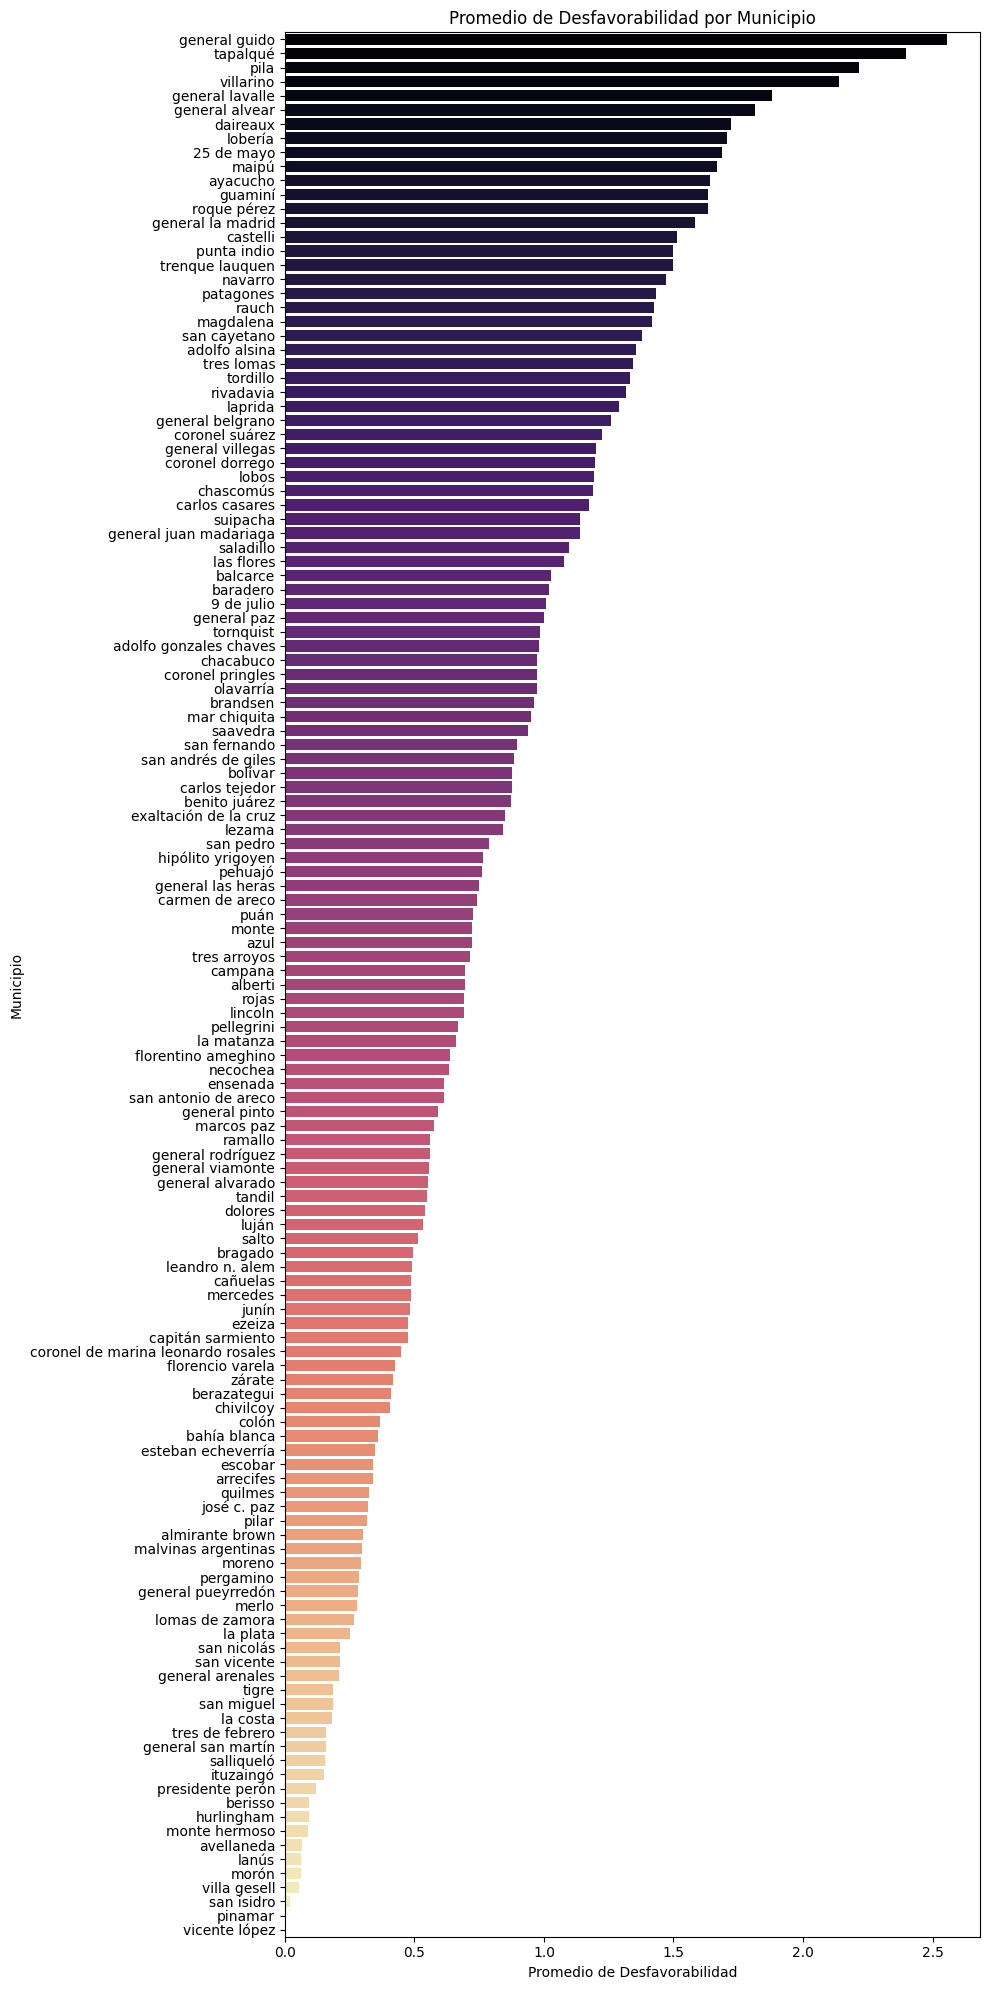

In [ ]:
#este grafico nos muestra el promedio de desfavorabilidad por municipio

df_copia_ordenado = df_copia.groupby('municipio_nombre')['desfavorabilidad'].mean().reset_index().sort_values(by='desfavorabilidad', ascending=False).copy()

plt.figure(figsize=(10, 20))
sns.barplot(data=df_copia_ordenado, y='municipio_nombre', x='desfavorabilidad', palette='magma', errorbar=None)
plt.title("Promedio de Desfavorabilidad por Municipio")
plt.xlabel("Promedio de Desfavorabilidad")
plt.ylabel("Municipio")
plt.tight_layout()
plt.show()

In [ ]:
mapa = folium.Map(location=[-35.293645, -60.094252], zoom_start=7) #creamos un mapa usando la libreria de folium usando como coordenadas principales un punto central de la provincia de bsas

data = [(lat,lon, esc, mat) for lat, lon, esc,mat,des in zip(df['latitud'],df['longitud'],df['establecimiento_nombre'],df['matricula'], df['desfavorabilidad']) if des == 5]
#creamos una lista de tuplas que contienen (latitud,longitud,nombre del establecimiento educativo,matriculas) que tienen desfavorabilidad 5


for lat, lon, esc, mat in data: #recorremos la lista de data desempaquetando la info en las variables lat, lon, esc y mat
    info = f'nombre del establecimiento: {esc} \n cantidad de alumnos: {mat}' #creamos un string con la info que queremos mostrar en el popup del marcador
    folium.Marker([lat, lon], popup=info,tooltip='click para mas info').add_to(mapa) #por cada dato de la lista, agregamos un marcador en el mapa con las coordenadas del establecimiento
                                                                                    #y al clickearlo un popup muestra el nombre del establecimiento educativo y la cantidad de alumnos
mapa.save('mapa.html') #guardamos el archivo generado del mapa

In [ ]:
mapa #visualizamos el mapa

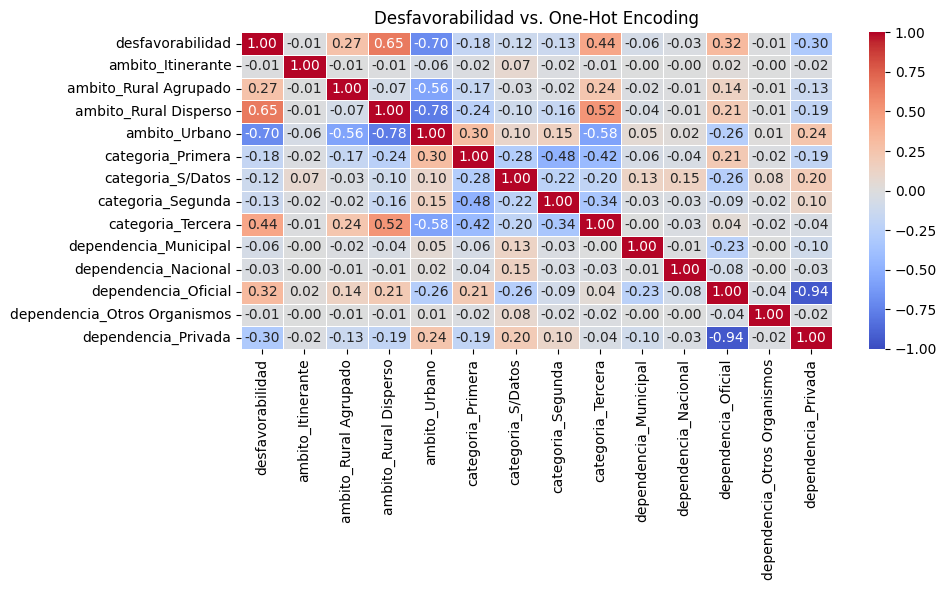

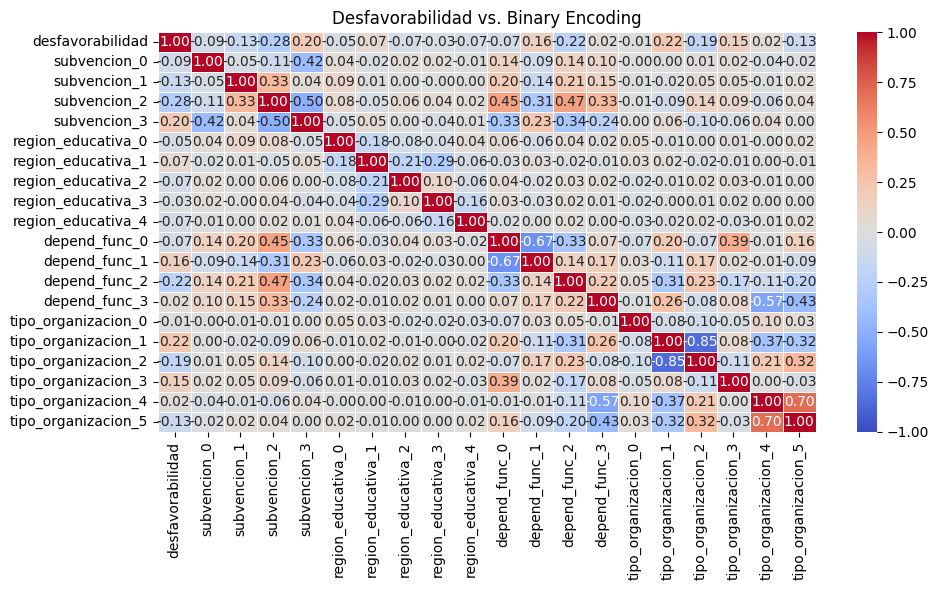

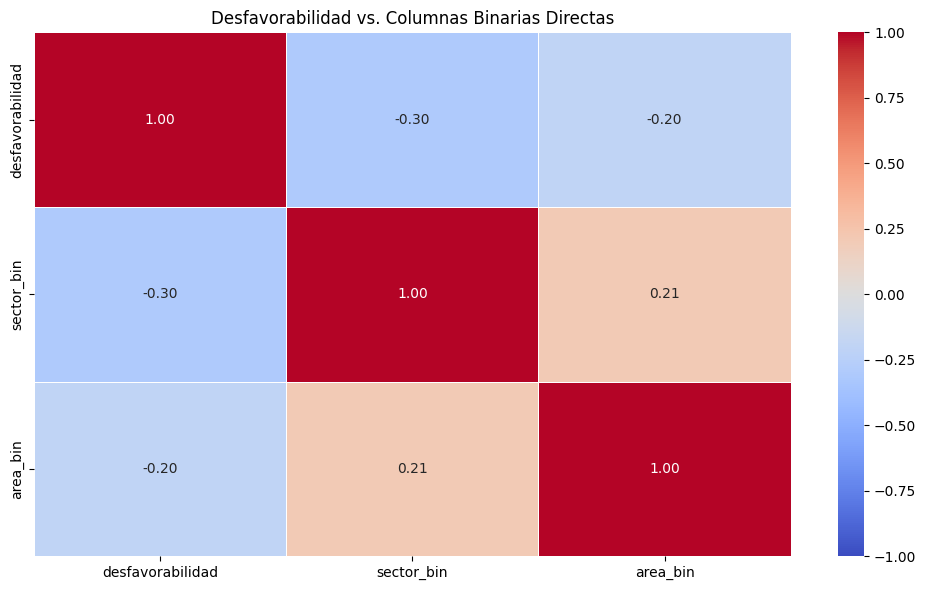

In [ ]:
#dividimos el mapa de correlacion de variables para poder comparar la desfavorabilidad con las diferentes codificaciones

# 1. Desfavorabilidad vs One-Hot Encoding
# Seleccionamos solo las columnas One-Hot (ambito, categoria, dependencia)
one_hot_columns = [col for col in df_copia_one_hot_binaria.columns if 'ambito_' in col or 'categoria_' in col or 'dependencia_' in col]
df_one_hot = df_copia_one_hot_binaria[['desfavorabilidad'] + one_hot_columns]

# Calculamos la correlación
corr_one_hot = df_one_hot.corr()

# Mapa de calor One-Hot
plt.figure(figsize=(10, 6))
sns.heatmap(corr_one_hot, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Desfavorabilidad vs. One-Hot Encoding")
plt.tight_layout()
plt.show()

# 2. Desfavorabilidad vs Binary Encoding
# Seleccionamos solo las columnas Binary Encoding (subvencion, region_educativa, depend_func, tipo_organizacion)
binary_columns = [col for col in df_copia_one_hot_binaria.columns if 'subvencion_' in col or 'region_educativa_' in col or 'depend_func_' in col or 'tipo_organizacion_' in col]
df_binary = df_copia_one_hot_binaria[['desfavorabilidad'] + binary_columns]

# Calculamos la correlación
corr_binary = df_binary.corr()

# Mapa de calor Binary Encoding
plt.figure(figsize=(10, 6))
sns.heatmap(corr_binary, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Desfavorabilidad vs. Binary Encoding")
plt.tight_layout()
plt.show()

# 3. Desfavorabilidad vs Columnas Binarias Directas (sector_bin, area_bin)
# Seleccionamos las columnas binarias directas (sector_bin, area_bin)
binary_direct_columns = ['sector_bin', 'area_bin']
df_binary_direct = df_copia_one_hot_binaria[['desfavorabilidad'] + binary_direct_columns]

# Calculamos la correlación
corr_binary_direct = df_binary_direct.corr()

# Mapa de calor Columnas Binarias Directas
plt.figure(figsize=(10, 6))
sns.heatmap(corr_binary_direct, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Desfavorabilidad vs. Columnas Binarias Directas")
plt.tight_layout()
plt.show()

<Axes: xlabel='ambito', ylabel='desfavorabilidad'>

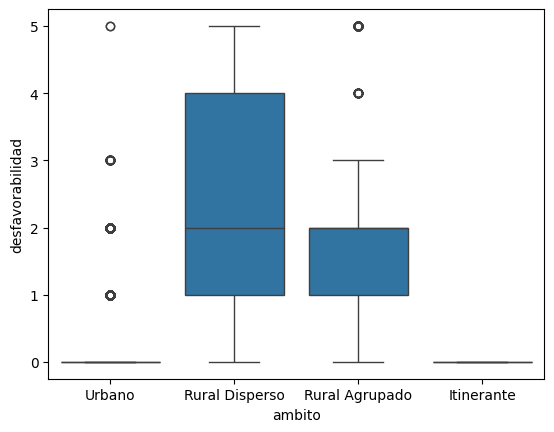

In [ ]:
#grafico que nos permite ver como se distribuye la desfavorabilidad segun el ambito
sns.boxplot(x='ambito', y='desfavorabilidad', data=df_copia)


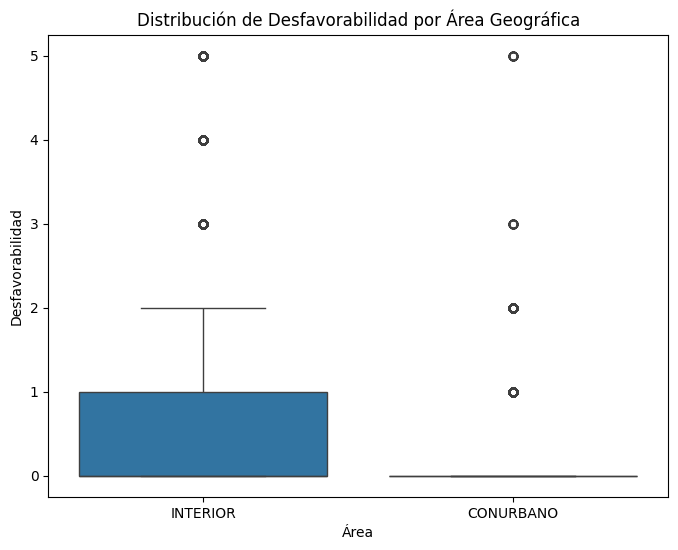

In [ ]:
#grafico que nos permite ver como se distribuye la desfavorabilidad segun el área
plt.figure(figsize=(8,6))
sns.boxplot(x='area', y='desfavorabilidad', data=df)
plt.title('Distribución de Desfavorabilidad por Área Geográfica')
plt.xlabel('Área')
plt.ylabel('Desfavorabilidad')
plt.show()

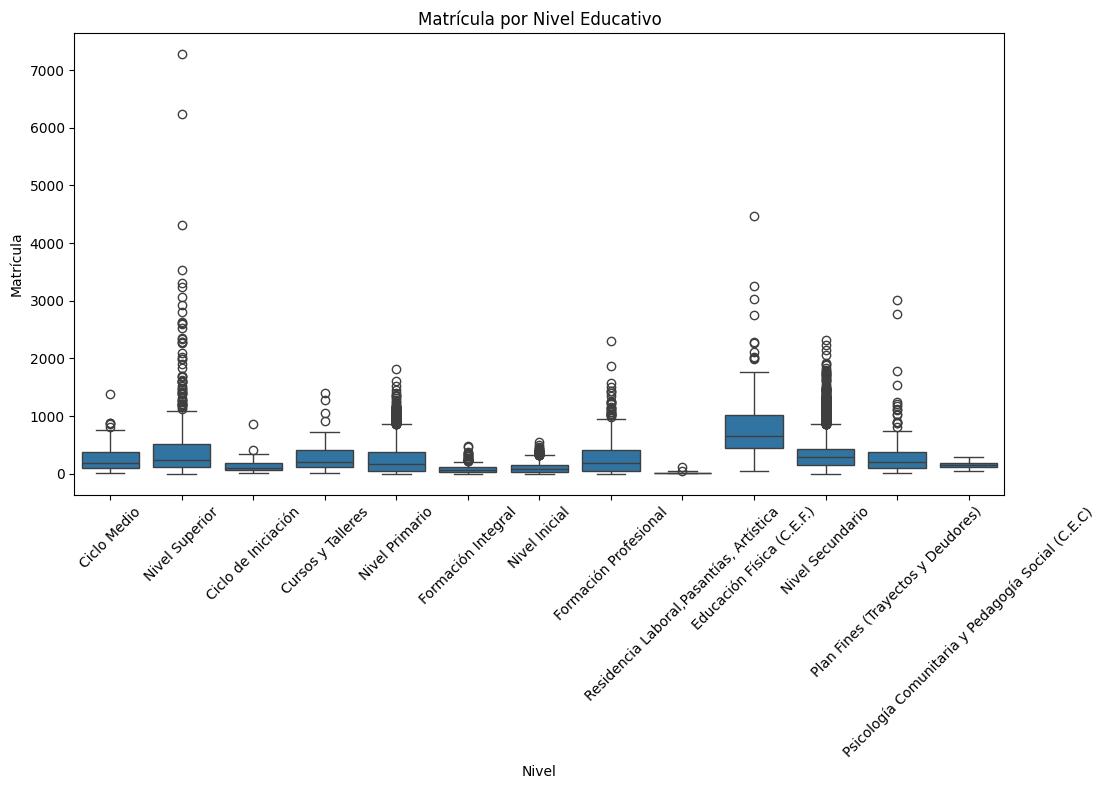

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='nivel', y='matricula', data=df)
plt.xticks(rotation=45)
plt.title('Matrícula por Nivel Educativo')
plt.xlabel('Nivel')
plt.ylabel('Matrícula')
plt.show()


# Modelo de machine learning con Random Forest

In [ ]:
#importamos librerias para realizar machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  f1_score, accuracy_score,precision_score,recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np

In [ ]:
# Features (usa el df ya codificado)
#eliminamos columnas que no sean de valor numerico
df_copia_one_hot_binaria = df_copia_one_hot_binaria.drop(columns=['municipio_nombre','establecimiento_nombre','region_educativa','modalidad','nivel','direccion','sector','area','tipo_organizacion','area','subvencion','sede_axo_ext','depend_func','cui','turnos','cue','anexo','nro_escuela',])


In [ ]:
#las columnas que van a ser usadas para el entrenamiento del modelo
df_copia_one_hot_binaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21573 entries, 0 to 21572
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   desfavorabilidad              21573 non-null  int64  
 1   matricula                     21573 non-null  int64  
 2   varones                       21573 non-null  int64  
 3   mujeres                       21573 non-null  int64  
 4   secciones                     21573 non-null  int64  
 5   latitud                       21573 non-null  float64
 6   longitud                      21573 non-null  float64
 7   poblacion_total               21573 non-null  int64  
 8   ambito_Itinerante             21573 non-null  int64  
 9   ambito_Rural Agrupado         21573 non-null  int64  
 10  ambito_Rural Disperso         21573 non-null  int64  
 11  ambito_Urbano                 21573 non-null  int64  
 12  categoria_Primera             21573 non-null  int64  
 13  c

In [ ]:
X = (df_copia_one_hot_binaria.drop(columns=['desfavorabilidad'])) #usa todos los datos pero elimina la columna de desfavorabilidad ya que es el target

y = df_copia_one_hot_binaria['desfavorabilidad'] #usa solo la columna desfavorabilidad

In [ ]:
# Dividimos los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%) para evaluar el modelo, fijando una semilla aleatoria (42) para reproducibilidad.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=15)

# cantidad de splits para los kfold
kf = KFold(n_splits=5)

#entrenamiento del modelo
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=300, random_state=42)

In [ ]:
accuracy_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring="accuracy") #validacion cruzada de acurracy

for fold, accuracy in enumerate(accuracy_scores, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy}") #los puntajes de accuracy con cada fold
print(f"Accuracy promedio {accuracy_scores.mean()}") #el puntaje promedio de accuracy


Fold 1: Accuracy = 0.8085168018539977
Fold 2: Accuracy = 0.8111239860950173
Fold 3: Accuracy = 0.805619930475087
Fold 4: Accuracy = 0.8177339901477833
Fold 5: Accuracy = 0.8041147493480151
Accuracy promedio 0.80942189158398


In [ ]:
precision_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring="precision_weighted") #validacion cruzada de Precision

for fold, precision in enumerate(precision_scores, start=1):
    print(f"Fold {fold}: Precision = {precision}")  #los puntajes de precision con cada fold
print(f"precision promedio {precision_scores.mean()}") #el puntaje promedio de precision


Fold 1: Precision = 0.7879260978083692
Fold 2: Precision = 0.7924989634782865
Fold 3: Precision = 0.7836978765634747
Fold 4: Precision = 0.7938307573577762
Fold 5: Precision = 0.7811856867577784
precision promedio 0.787827876393137


In [ ]:
recall_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring="recall_weighted") #validacion cruzada de Recall

for fold, recall in enumerate(recall_scores, start=1):
    print(f"Fold {fold}: Recall = {recall}") #los puntajes de recall con cada fold
print(f"precision promedio {recall_scores.mean()}") #el puntaje promedio de recall

Fold 1: Recall = 0.8085168018539977
Fold 2: Recall = 0.8111239860950173
Fold 3: Recall = 0.805619930475087
Fold 4: Recall = 0.8177339901477833
Fold 5: Recall = 0.8041147493480151
precision promedio 0.80942189158398


In [ ]:
f1_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring="f1_weighted") #validacion cruzada de F1

for fold, f1 in enumerate(f1_scores, start=1):
    print(f"Fold {fold}: F1 Score = {f1}") #los puntajes de F1 score con cada fold
print(f"precision promedio {f1_scores.mean()}") #el puntaje promedio de F1 Score

Fold 1: F1 Score = 0.7911382740302364
Fold 2: F1 Score = 0.7970755839034467
Fold 3: F1 Score = 0.7891820783192607
Fold 4: F1 Score = 0.7993403576100513
Fold 5: F1 Score = 0.7857841245884667
precision promedio 0.7925040836902923


In [ ]:
y_pred = rf.predict(X_test)

#acc
print("Accuracy:", accuracy_score(y_test, y_pred)) #proporcion de predicciones correctas
#precision
print("Precision:", precision_score(y_test, y_pred, average='weighted')) #proporcion de predicciones positivas correctas
#recall
print("Recall:", recall_score(y_test, y_pred, average='weighted')) #proporcion de positivos reales correctamente identificados
#f1
print("F1 Score:", f1_score(y_test, y_pred, average='weighted')) #proporcion balanceada entre precision y recall


Accuracy: 0.8095017381228273
Precision: 0.7871239562580769
Recall: 0.8095017381228273
F1 Score: 0.7945764501141954


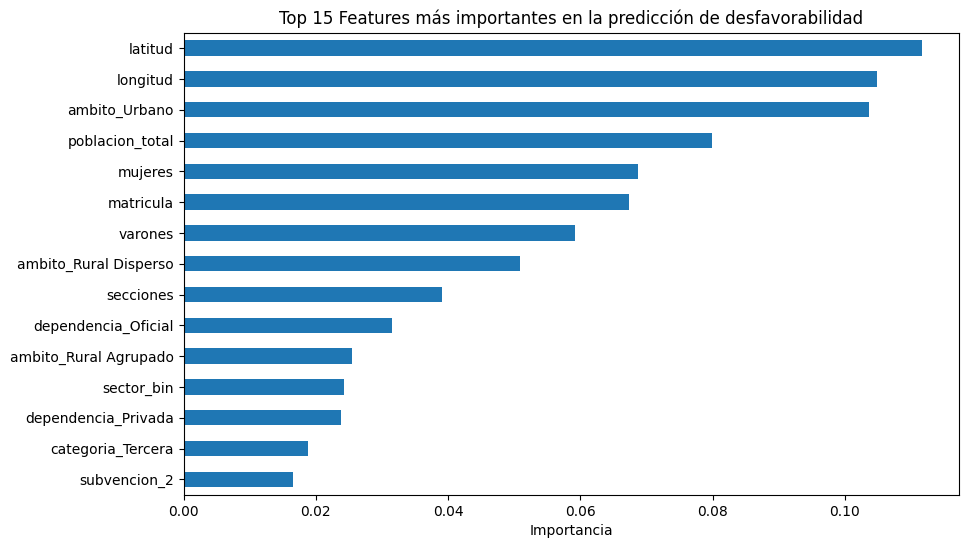

In [ ]:
#grafico para ver las 15 variables que mas influyen en la prediccion del inidice de desfavorabilidad
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
importances.plot(kind='barh')
plt.title('Top 15 Features más importantes en la predicción de desfavorabilidad')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
test_manual = pd.DataFrame([
    {
        'matricula': 5,
        'varones': 3,
        'mujeres': 2,
        'secciones': 0.00,
        'latitud': -36.391082,
        'longitud': -57.767920,
        'poblacion_total': 32032,
        'ambito_Itinerante': 0.00,
        'ambito_Rural Agrupado': 1.00,
        'ambito_Rural Disperso': 0.00,
        'ambito_Urbano': 0.00,
        'categoria_Primera': 0.00,
        'categoria_S/Datos': 0.00,
        'categoria_Segunda': 1.00,
        'categoria_Tercera': 0.00,
        'dependencia_Municipal': 1.00,
        'dependencia_Nacional': 0.00,
        'dependencia_Oficial': 0.00,
        'dependencia_Otros Organismos': 0.00,
        'dependencia_Privada': 0.00,
        'subvencion_0': 0.00,
        'subvencion_1': 0.00,
        'subvencion_2': 0.00,
        'subvencion_3': 1.00,
        'region_educativa_0': 0.00,
        'region_educativa_1': 1.00,
        'region_educativa_2': 0.00,
        'region_educativa_3': 1.00,
        'region_educativa_4': 0.00,
        'depend_func_0': 0.00,
        'depend_func_1': 0.00,
        'depend_func_2': 1.00,
        'depend_func_3': 0.00,
        'tipo_organizacion_0': 0.00,
        'tipo_organizacion_1': 1.00,
        'tipo_organizacion_2': 0.00,
        'tipo_organizacion_3': 1.00,
        'tipo_organizacion_4': 0.00,
        'tipo_organizacion_5': 0.00,
        'sector_bin': 0.00,
        'area_bin': 0.00
    }
])

# Aseguramos el orden de columnas igual al del modelo
test_manual = test_manual[X.columns]

# Predecir
predicciones = rf.predict(test_manual)

# Mostrar resultados junto con los valores reales
y_reales = [ 2]
resultados = pd.DataFrame({
    'Desfavorabilidad_real': y_reales,
    'Predicción_modelo': predicciones
})

print(resultados)

   Desfavorabilidad_real  Predicción_modelo
0                      2                  2
